In [33]:
import numpy as np
import scipy.optimize
import pandas as pd
import operator
import scipy.io
import scipy
import scipy.sparse
import time
import sys
import os
import matplotlib.pyplot as plt

In [34]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'mmort')))
import experiments
import optimization_tools
import evaluation
import utils

In [187]:
data_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'ProstateExample_BODY_not_reduced_with_OAR_constraints.mat'))
# data_no_body_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'ProstateExample.mat'))
data = scipy.io.loadmat(data_path)
# data_no_body =  scipy.io.loadmat(data_no_body_path)
Alpha = np.array([0.35, 0.35])
Beta = np.array([0.175, 0.175])
Gamma = np.array([np.array([0.35, 0.35]),
                  np.array([0.35, 0.35]),
                  np.array([0.35, 0.35]),
                  np.array([0.35, 0.35]),
                  np.array([0.35, 0.35])               
                 ])
Delta = np.array([np.array([0.07, 0.07]),
                  np.array([0.07, 0.07]),
                  np.array([0.175, 0.175]),
                  np.array([0.175, 0.175]),
                  np.array([0.175, 0.175])                
                 ])
modality_names = np.array(['Aphoton', 'Aproton'])

num_body_voxels = 683189
data['Aphoton'][-1] = data['Aphoton'][-1]/num_body_voxels
data['Aproton'][-1] = data['Aproton'][-1]/num_body_voxels

In [181]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar  1 01:37:10 2020',
 '__version__': '1.0',
 '__globals__': [],
 'Aproton': <32061x16358 sparse matrix of type '<class 'numpy.float64'>'
 	with 16735951 stored elements in Compressed Sparse Column format>,
 'Organ': array([[array(['Target'], dtype='<U6'), array(['Rectum'], dtype='<U6'),
         array(['Bladder'], dtype='<U7'), array(['R Femur'], dtype='<U7'),
         array(['L Femur'], dtype='<U7'), array(['BODY'], dtype='<U4')]],
       dtype=object),
 'beamlet_pos': array([[-70.,  15.],
        [-70.,  20.],
        [-70.,  25.],
        ...,
        [ 50.,  20.],
        [ 50.,  25.],
        [ 50.,  30.]]),
 'maxAreducedphoton': <30207x2289 sparse matrix of type '<class 'numpy.float64'>'
 	with 16478507 stored elements in Compressed Sparse Column format>,
 'num_beamlets': array([[480, 405, 497, 493, 414]], dtype=uint16),
 'num_voxels': array([[ 6782,  1773, 11595,  5958,  5952,     1]]),
 'maxAreducedproton':

In [182]:
#Max dose for dv constrained organs:
import copy

data_max_dose = copy.deepcopy(data)
data_max_dose['OAR_constraint_types'][data_max_dose['OAR_constraint_types'] == 'dose_volume'] = 'max_dose'
data_max_dose

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar  1 01:37:10 2020',
 '__version__': '1.0',
 '__globals__': [],
 'Aproton': <32061x16358 sparse matrix of type '<class 'numpy.float64'>'
 	with 16735951 stored elements in Compressed Sparse Column format>,
 'Organ': array([[array(['Target'], dtype='<U6'), array(['Rectum'], dtype='<U6'),
         array(['Bladder'], dtype='<U7'), array(['R Femur'], dtype='<U7'),
         array(['L Femur'], dtype='<U7'), array(['BODY'], dtype='<U4')]],
       dtype=object),
 'beamlet_pos': array([[-70.,  15.],
        [-70.,  20.],
        [-70.,  25.],
        ...,
        [ 50.,  20.],
        [ 50.,  25.],
        [ 50.,  30.]]),
 'maxAreducedphoton': <30207x2289 sparse matrix of type '<class 'numpy.float64'>'
 	with 16478507 stored elements in Compressed Sparse Column format>,
 'num_beamlets': array([[480, 405, 497, 493, 414]], dtype=uint16),
 'num_voxels': array([[ 6782,  1773, 11595,  5958,  5952,     1]]),
 'maxAreducedproton':

In [183]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar  1 01:37:10 2020',
 '__version__': '1.0',
 '__globals__': [],
 'Aproton': <32061x16358 sparse matrix of type '<class 'numpy.float64'>'
 	with 16735951 stored elements in Compressed Sparse Column format>,
 'Organ': array([[array(['Target'], dtype='<U6'), array(['Rectum'], dtype='<U6'),
         array(['Bladder'], dtype='<U7'), array(['R Femur'], dtype='<U7'),
         array(['L Femur'], dtype='<U7'), array(['BODY'], dtype='<U4')]],
       dtype=object),
 'beamlet_pos': array([[-70.,  15.],
        [-70.,  20.],
        [-70.,  25.],
        ...,
        [ 50.,  20.],
        [ 50.,  25.],
        [ 50.,  30.]]),
 'maxAreducedphoton': <30207x2289 sparse matrix of type '<class 'numpy.float64'>'
 	with 16478507 stored elements in Compressed Sparse Column format>,
 'num_beamlets': array([[480, 405, 497, 493, 414]], dtype=uint16),
 'num_voxels': array([[ 6782,  1773, 11595,  5958,  5952,     1]]),
 'maxAreducedproton':

In [96]:
# %%time
# T_list_mult_max, T_mult_max, H_mult_max, alpha_mult_max, gamma_mult_max, B_mult_max, D_mult_max, C_mult_max = experiments.construct_auto_param_solver_input(np.array([43,1]), Alpha, Beta, Gamma, Delta, data_max_dose, modality_names)
# # u_init = 10*np.ones(2289+16358)
# utils.save_obj(T_list_mult_max, 'T_list_mult_max')
# utils.save_obj(T_mult_max, 'T_mult_max')
# utils.save_obj(H_mult_max, 'H_mult_max')
# utils.save_obj(alpha_mult_max, 'alpha_mult_max')
# utils.save_obj(gamma_mult_max, 'gamma_mult_max')
# utils.save_obj(B_mult_max, 'B_mult_max')
# utils.save_obj(D_mult_max, 'D_mult_max')
# utils.save_obj(C_mult_max, 'C_mult_max')

getting through 25279 matrices
CPU times: user 22min 29s, sys: 8.2 s, total: 22min 37s
Wall time: 22min 6s


In [100]:
data_max_dose['num_voxels'][0][1:].sum()

25279

In [103]:
len(C_mult_max)

25279

In [38]:
# data_no_body['beamlet_pos'] = data['beamlet_pos']
# data_no_body['num_beamlets'] = data['num_beamlets']
# data_no_body['OAR_constraint_types'] = data['OAR_constraint_types']
# data_no_body['OAR_constraint_values'] = data['OAR_constraint_values']
# data_no_body['OAR_constraint_types'] = data_no_body['OAR_constraint_types'][:-1]
# data_no_body['OAR_constraint_values'] = np.array([data_no_body['OAR_constraint_values'][0][:-1]])
# data_no_body['OAR_constraint_values'], data_no_body['OAR_constraint_types']

(array([[50, 50, 60, 60]]),
 array(['dose_volume', 'dose_volume', 'max_dose   ', 'max_dose   '],
       dtype='<U11'))

In [ ]:
# def constraint_generation(u_init11, T_mult, H_mult, alpha_mult, gamma_mult, B_mult, D_mult, C_mult, eta_step = 0.9, ftol = 1e-3, max_iter = 300, verbose = 1, eta = eta, eta_0 = eta_0):
#     %%time
#     #Multi-modality optimal
#     u_mult, eta_0_mult, eta_mult, auto_param_obj_history_mult, auto_param_relaxed_obj_history_mult = optimization_tools.solver_auto_param(u_init11, T_mult, H_mult, alpha_mult, gamma_mult, B_mult, D_mult, C_mult, eta_step = 0.9, ftol = 1e-3, max_iter = 300, verbose = 1, eta = eta, eta_0 = eta_0)
#     utils.save_obj(u_mult, 'u_mult')
#     utils.save_obj(eta_0_mult, 'eta_0_mult')
#     utils.save_obj(eta_mult, 'eta_mult')
#     utils.save_obj(auto_param_obj_history_mult, 'auto_param_obj_history_mult')
#     utils.save_obj(auto_param_relaxed_obj_history_mult, 'auto_param_relaxed_obj_history_mult')

In [275]:
def generate_dose_volume_input(T_list_mult_max, T_mult_max, H_mult_max, alpha_mult_max, gamma_mult_max, B_mult_max, D_mult_max, C_mult_max, u_mult, N, data, Alpha, Beta, Gamma, Delta, photon_only = False):
    oar_indices = np.split(np.arange(data['Aphoton'].shape[0]), np.cumsum(np.squeeze(data['num_voxels'])[1:]))[:-1]
    dv_oar_names = [str(i[0]) for i in np.squeeze(data['Organ'])[1:][data['OAR_constraint_types'] == 'dose_volume']]
    for i, name in enumerate(dv_oar_names):
        if photon_only:
            _, _, oar_BE, _, oar_photon_BE = evaluation_function_photon(u_mult, N, data, name, Alpha, Beta, Gamma, Delta, 3000, resolution = 500)
            print(oar_BE, oar_photon_BE)
        else:
            _,_,_,_,_, oar_photon_BE, oar_proton_BE = evaluation.evaluation_function(u_mult, N, data, name, Alpha, Beta, Gamma, Delta, 3000, resolution = 500)
            oar_BE = oar_photon_BE + oar_proton_BE
        #Take the low 50% of the voxels
        cur_oar_indices_to_max_constrain = np.argsort(oar_BE)[:(oar_BE.shape[0]//2 + oar_BE.shape[0]%2)]
#         constraint = np.array(C_mult_max)[oar_indices[0]]
        cur_oar_number = np.arange(len(oar_indices))[data['OAR_constraint_types'] == 'dose_volume'][i]
        oar_indices[cur_oar_number] = cur_oar_indices_to_max_constrain
    updated_C = [C_mult_max[i] for oar in oar_indices for i in oar]
    updated_H = [H_mult_max[i] for oar in oar_indices for i in oar]
    updated_gamma = [gamma_mult_max[i] for oar in oar_indices for i in oar]
    updated_D = [D_mult_max[i] for oar in oar_indices for i in oar]
    return oar_indices, T_list_mult_max, T_mult_max, updated_H, alpha_mult_max, updated_gamma, B_mult_max, updated_D, updated_C

In [39]:
# %%time
# T_list_mult, T_mult, H_mult, alpha_mult, gamma_mult, B_mult, D_mult, C_mult = experiments.construct_auto_param_solver_input(np.array([43,1]), Alpha, Beta, Gamma, Delta, data, modality_names)
# # u_init = 10*np.ones(2289+16358)
# utils.save_obj(T_list_mult, 'T_list_mult')
# utils.save_obj(T_mult, 'T_mult')
# utils.save_obj(H_mult, 'H_mult')
# utils.save_obj(alpha_mult, 'alpha_mult')
# utils.save_obj(gamma_mult, 'gamma_mult')
# utils.save_obj(B_mult, 'B_mult')
# utils.save_obj(D_mult, 'D_mult')
# utils.save_obj(C_mult, 'C_mult')

In [237]:
T_list_mult = utils.load_obj( 'T_list_mult')
T_mult = utils.load_obj('T_mult')
H_mult = utils.load_obj('H_mult')
alpha_mult = utils.load_obj('alpha_mult')
gamma_mult = utils.load_obj('gamma_mult')
B_mult = utils.load_obj('B_mult')
D_mult = utils.load_obj('D_mult')
C_mult = utils.load_obj('C_mult')

In [238]:
#Assuming N>0, and two-modality case
N = np.array([43, 1])
Rx = 190#190 160 120 80
LHS1 = T_list_mult[0]
LHS2 = T_list_mult[1]
RHS1 = np.array([Rx/np.sum(N)]*LHS1.shape[0])
RHS2 = np.array([Rx/np.sum(N)]*LHS2.shape[0])

u1_guess = scipy.optimize.lsq_linear(LHS1, RHS1, bounds = (0, np.inf), tol=1e-3, lsmr_tol=1e-2, max_iter=30, verbose=1).x
u2_guess = scipy.optimize.lsq_linear(LHS2, RHS2, bounds = (0, np.inf), tol=1e-3, lsmr_tol=1e-2, max_iter=30, verbose=1).x

The maximum number of iterations is exceeded.
Number of iterations 30, initial cost 1.4276e+00, final cost 8.3652e-01, first-order optimality 2.32e-02.
The relative change of the cost function is less than `tol`.
Number of iterations 7, initial cost 6.1541e+00, final cost 4.1297e+00, first-order optimality 4.15e-03.


In [239]:
u_init11 = np.concatenate([u1_guess, u2_guess])
# u_init11 = np.concatenate([u_conv, np.zeros(u2_guess.shape[0])])
eta_0 =  (1/(2*np.max(B_mult)))*0.9 #Initialize eta_0
eta = np.array([eta_0/len(H_mult)]*len(H_mult))*1e-7

In [89]:
%%time
#Multi-modality optimal
u_mult, eta_0_mult, eta_mult, auto_param_obj_history_mult, auto_param_relaxed_obj_history_mult = optimization_tools.solver_auto_param(u_init11, T_mult, H_mult, alpha_mult, gamma_mult, B_mult, D_mult, C_mult, eta_step = 0.9, ftol = 1e-3, max_iter = 300, verbose = 1, eta = eta, eta_0 = eta_0)
utils.save_obj(u_mult, 'u_mult')
utils.save_obj(eta_0_mult, 'eta_0_mult')
utils.save_obj(eta_mult, 'eta_mult')
utils.save_obj(auto_param_obj_history_mult, 'auto_param_obj_history_mult')
utils.save_obj(auto_param_relaxed_obj_history_mult, 'auto_param_relaxed_obj_history_mult')

wi update took: 2.2478525638580322
      fun: 3197811820099.285
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.19883702e+08, -2.71597059e+08, -3.37020252e+08, ...,
        1.74747113e+08,  1.73877080e+08,  1.73049218e+08])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 54
      nit: 50
   status: 1
  success: False
        x: array([0.00000000e+00, 4.42968935e-02, 8.77127622e-02, ...,
       6.42759059e+01, 6.13732187e+01, 5.77655008e+01])
u update took: 3.8549439907073975
    iter = 1, stopping criterium:63954793207005.9, OBJ -1099866.281368731
    This iteration took: 6.599977493286133
wi update took: 1.3356988430023193
      fun: 470388407327.09644
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.42746484e+08, -1.88337136e+08, -2.76706257e+08, ...,
       -1.22860869e+07, -1.21437137e+07, -1.20063531e+07])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 53
      nit: 

    iter = 13, stopping criterium:0.5262087142498281, OBJ -26175514841.013813
    This iteration took: 5.401942014694214
wi update took: 0.935448169708252
      fun: 1188706788203.5444
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.46157026e+08, -9.08477030e+07, -3.18131283e+07, ...,
       -4.74903738e+06, -4.70249313e+06, -4.65745647e+06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 28
      nit: 21
   status: 0
  success: True
        x: array([ 0.40330024,  0.33353352,  0.34193026, ..., 63.97227974,
       61.08303837, 57.4920547 ])
u update took: 1.735382080078125
    iter = 14, stopping criterium:0.40680276294552736, OBJ -33790164677.259377
    This iteration took: 3.140209913253784
wi update took: 0.925682544708252
      fun: 1538915557648.4382
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.91065578e+08, -2.18078443e+07, -2.65111455e+07, ...,
       -2.37504198e+06, -2.350615

    iter = 2, stopping criterium:4.636041399167669, OBJ -11671116864.729143
    This iteration took: 5.867315769195557
wi update took: 0.889575719833374
      fun: 41906721697.73348
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.00847991e+08, -4.94870835e+07, -3.38921754e+07, ...,
       -2.14983311e+08, -2.14058883e+08, -2.13175397e+08])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 59
      nit: 50
   status: 1
  success: False
        x: array([ 0.40187566,  0.33762035,  0.34867889, ..., 63.74892718,
       60.87098185, 57.2940898 ])
u update took: 4.525144815444946
    iter = 3, stopping criterium:4.86152877422781, OBJ -179606685635.5185
    This iteration took: 5.965140342712402
wi update took: 0.8948328495025635
      fun: 1990779960901.7542
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.05924584e+08,  7.17763482e+07, -5.44814206e+07, ...,
       -5.88524981e+06, -5.83889920e+06, -5

    iter = 15, stopping criterium:0.13726712912606878, OBJ -286600137974069.5
    This iteration took: 3.416428327560425
wi update took: 1.0225448608398438
      fun: 2169302881453522.0
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.41048892e+08,  2.49806944e+09,  1.22238739e+09, ...,
       -1.23750952e+08, -1.23276620e+08, -1.22824393e+08])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 60
      nit: 48
   status: 0
  success: True
        x: array([ 0.79862715,  0.        ,  0.09221107, ..., 63.14204817,
       60.2939931 , 56.7543584 ])
u update took: 3.4409050941467285
    iter = 16, stopping criterium:1.8500825847024867, OBJ -1908455780633488.8
    This iteration took: 4.95433783531189
wi update took: 1.0822601318359375
      fun: 2.226196757596798e+16
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([9.55465052e+09, 8.63081588e+09, 2.29145202e+09, ...,
       2.83844415e+06, 2.7786009

In [243]:
%%time
#Now with DVH constraints:
oar_indices, T_list_mult_max, T_mult_max, updated_H, alpha_mult_max, updated_gamma, B_mult_max, updated_D, updated_C = generate_dose_volume_input(T_list_mult_max, T_mult_max, H_mult_max, alpha_mult_max, gamma_mult_max, B_mult_max, D_mult_max, C_mult_max, u_mult, N, data, Alpha, Beta, Gamma, Delta)

eta_0 =  (1/(2*np.max(B_mult_max)))*0.9 #Initialize eta_0
eta = np.array([eta_0/len(updated_H)]*len(updated_H))*1e-7

u_mult_dv, eta_0_mult_dv, eta_mult_dv, auto_param_obj_history_mult_dv, auto_param_relaxed_obj_history_mult_dv = optimization_tools.solver_auto_param(u_mult, T_mult_max, updated_H, alpha_mult_max, updated_gamma, B_mult_max, updated_D, updated_C, eta_step = 0.9, ftol = 1e-3, max_iter = 300, verbose = 1, eta = eta, eta_0 = eta_0)
utils.save_obj(u_mult_dv, 'u_mult_dv')
utils.save_obj(eta_0_mult_dv, 'eta_0_mult_dv')
utils.save_obj(eta_mult_dv, 'eta_mult_dv')
utils.save_obj(auto_param_obj_history_mult_dv, 'auto_param_obj_history_mult_dv')
utils.save_obj(auto_param_relaxed_obj_history_mult_dv, 'auto_param_relaxed_obj_history_mult_dv')

wi update took: 6.316335916519165
      fun: 1993857416638957.5
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.40706517e+09,  8.30822713e+09,  6.02368519e+09, ...,
       -6.70672426e+10, -7.58406621e+10, -8.51736752e+10])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 57
      nit: 50
   status: 1
  success: False
        x: array([0.14742223, 0.14175195, 0.07797332, ..., 9.49287765, 9.67116669,
       9.77993501])
u update took: 4.684445858001709
    iter = 1, stopping criterium:3.9875441366485496e+16, OBJ -2236082.05135881
    This iteration took: 11.664602041244507
wi update took: 3.4002044200897217
      fun: 19128642909576.938
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.64442356e+09, -3.16704005e+09, -1.73648036e+09, ...,
       -1.14774119e+08, -1.19291119e+08, -1.10750887e+08])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 54
      nit: 50
   status: 1
  s

wi update took: 1.7454988956451416
      fun: 128802576188.15245
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.63419521e+08, -1.49936642e+08, -8.85398784e+07, ...,
        2.46008449e+07,  2.61483393e+07,  2.75805422e+07])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 59
      nit: 56
   status: 1
  success: False
        x: array([1.14475854, 0.83719926, 0.48329731, ..., 9.42623777, 9.60384196,
       9.71060064])
u update took: 4.7133941650390625
    iter = 14, stopping criterium:0.14976217389321153, OBJ -1056055.9252429414
    This iteration took: 7.130246162414551
wi update took: 1.448127031326294
      fun: 109369027124.98442
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.16377042e+08, -1.22441067e+08, -7.70727395e+07, ...,
        8.91279559e+06,  9.56606775e+06,  1.03394939e+07])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 63
      nit: 58
   status: 1
  s

/home/rilevin/miniconda3/envs/mmort/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


wi update took: 1.63456392288208
      fun: 78134980632.82014
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.47899228e+08, -8.42938572e+07, -4.67387462e+07, ...,
        1.71762462e+07,  1.82344177e+07,  1.91579155e+07])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 68
      nit: 65
   status: 1
  success: False
        x: array([1.24398531, 0.89066352, 0.5146865 , ..., 9.42927092, 9.60694263,
       9.7136287 ])
u update took: 5.222851753234863
    iter = 17, stopping criterium:0.15558367287269267, OBJ -1010262.3842997159
    This iteration took: 7.6998374462127686
wi update took: 1.3656864166259766
      fun: 66537687175.14492
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.30084678e+08, -5.56747734e+07, -2.33952002e+07, ...,
        1.58014836e+07,  1.67444948e+07,  1.75477679e+07])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 71
      nit: 69
   status: 1
  succ

    iter = 29, stopping criterium:0.15860379426713964, OBJ -836023.7376099272
    This iteration took: 12.335399866104126
wi update took: 1.4149513244628906
      fun: 8472848714.834585
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-33940726.49804688,  -8448251.99780273, -11828344.86682129, ...,
         1969221.22862244,   2026579.58378601,   2067985.18702698])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 138
      nit: 133
   status: 1
  success: False
        x: array([1.77593812, 1.07682761, 0.66746177, ..., 9.4345651 , 9.61241003,
       9.71884565])
u update took: 10.084462404251099
    iter = 30, stopping criterium:0.14783798917248417, OBJ -827331.3966640835
    This iteration took: 12.267850399017334
wi update took: 1.385232925415039
      fun: 7227117824.513563
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-29459978.37939453,  -7387074.23950195, -10086286.43981934, ...,
          26

    iter = 42, stopping criterium:0.13251654150716316, OBJ -759427.8828551156
    This iteration took: 19.391344785690308
wi update took: 1.465989112854004
      fun: 1251867195.4923515
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5191765.80175781,  -533286.25097656, -1661402.86633301, ...,
         -84701.66033936,   -91282.48017883,   -93982.33103943])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 247
      nit: 232
   status: 1
  success: False
        x: array([2.10894598, 1.13938557, 0.77338046, ..., 9.43367785, 9.61162666,
       9.71801614])
u update took: 17.768494844436646
    iter = 43, stopping criterium:0.1332482419746922, OBJ -756140.4853999842
    This iteration took: 19.959112644195557
wi update took: 1.4317927360534668
      fun: 1095443643.0779781
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3863776.50878906,  -463303.51855469, -1474731.46264648, ...,
         -59609.7256

    iter = 55, stopping criterium:0.12739767776844507, OBJ -729738.4456553838
    This iteration took: 44.94039463996887
wi update took: 2.859434127807617
      fun: 240533654.35376206
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([1162266.16674805,  245157.03125   ,  -13067.1998291 , ...,
        -27186.52120972,  -24850.4730835 ,  -22960.01701355])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 374
      nit: 352
   status: 1
  success: False
        x: array([2.28304243, 1.17206094, 0.80189833, ..., 9.43331404, 9.61132071,
       9.71771516])
u update took: 47.11506271362305
    iter = 56, stopping criterium:0.12269547871951834, OBJ -728289.2998725418
    This iteration took: 51.39643406867981
wi update took: 3.130821466445923
      fun: 213406657.73810723
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([1358456.80810547,  215018.40991211, -140572.61865234, ...,
        -69119.69955444,  -68188

    iter = 68, stopping criterium:0.06771671332505468, OBJ -719706.4461810912
    This iteration took: 12.743711948394775
wi update took: 2.1680593490600586
      fun: 80506080.76307529
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.61676242e+06, -6.82773823e+05, -2.05961253e+05, ...,
        9.68922104e+02,  8.24054199e+02,  7.90423065e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 41
      nit: 39
   status: 0
  success: True
        x: array([2.33194851, 1.1849656 , 0.80025096, ..., 9.43326643, 9.61127115,
       9.71766477])
u update took: 5.646209955215454
    iter = 69, stopping criterium:0.0653079285555636, OBJ -719698.5943594966
    This iteration took: 8.567262172698975
wi update took: 2.551309823989868
      fun: 76396641.09392361
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([486422.60058594,  87007.57568359, -34884.00024414, ...,
        11531.64517212,  14210.22180176, 

    iter = 81, stopping criterium:0.05735610492919331, OBJ -718554.37585641
    This iteration took: 7.30106782913208
wi update took: 3.132359743118286
      fun: 54255625.265335076
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1234992.31640625,  -483218.09130859,  -306009.87231445, ...,
          -7193.98570251,    -7842.37313843,    -7831.4118042 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 40
      nit: 38
   status: 0
  success: True
        x: array([2.33777664, 1.18708126, 0.80015329, ..., 9.4332632 , 9.61126674,
       9.71765842])
u update took: 5.937481880187988
    iter = 82, stopping criterium:0.05647483508028279, OBJ -718549.4002089817
    This iteration took: 10.273435354232788
wi update took: 2.7985470294952393
      fun: 53319074.0225002
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-986723.89501953, -232754.02661133, -182089.00866699, ...,
         -3107.06459045,   -

    iter = 94, stopping criterium:0.056029307611707456, OBJ -718507.7054720246
    This iteration took: 9.510209083557129
wi update took: 3.420506477355957
      fun: 45565752.5748882
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-931116.42480469, -219559.10253906, -292971.20422363, ...,
         -5207.25578308,   -5616.80905151,   -5496.28633118])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 32
      nit: 28
   status: 0
  success: True
        x: array([2.33789434, 1.18711553, 0.80018644, ..., 9.4332542 , 9.61125761,
       9.71764917])
u update took: 4.774654388427734
    iter = 95, stopping criterium:0.055978319852015124, OBJ -718505.2273647315
    This iteration took: 9.02018117904663
wi update took: 2.2063148021698
      fun: 45119722.46765413
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1017902.57324219,  -316220.18066406,  -404311.53088379, ...,
          -2016.43955994,    -22

    iter = 107, stopping criterium:0.06791681462169204, OBJ -718481.8830916107
    This iteration took: 8.065899133682251
wi update took: 2.79423451423645
      fun: 41126504.55815483
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-811904.21435547, -198578.02685547, -285539.42907715, ...,
        -11099.34306335,  -11815.71035767,  -11930.41470337])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 17
      nit: 15
   status: 0
  success: True
        x: array([2.33794773, 1.18713037, 0.80020632, ..., 9.43324375, 9.61124698,
       9.71763842])
u update took: 2.631131410598755
    iter = 108, stopping criterium:0.06832291189480422, OBJ -718480.6789038171
    This iteration took: 6.2795469760894775
wi update took: 2.9341297149658203
      fun: 40884446.94115639
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-788345.32324219, -230837.78930664, -337388.06188965, ...,
         -7098.02481079,   -75

    iter = 120, stopping criterium:0.12331966351324473, OBJ -718465.435082097
    This iteration took: 6.769392013549805
wi update took: 3.110630750656128
      fun: 38578966.253186524
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-804710.78198242, -313388.15917969, -405181.30395508, ...,
        -10280.95770264,  -10903.34819031,  -10982.025177  ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 16
   status: 0
  success: True
        x: array([2.33797631, 1.18713816, 0.80021854, ..., 9.433232  , 9.61123502,
       9.71762632])
u update took: 2.8794238567352295
    iter = 121, stopping criterium:0.1391858151741617, OBJ -718464.4116145278
    This iteration took: 7.5236430168151855
wi update took: 2.7763137817382812
      fun: 38429830.77553915
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-804070.10473633, -323929.91796875, -415020.55395508, ...,
        -10607.1590271 ,  -11

    iter = 133, stopping criterium:0.246158718441275, OBJ -718453.5270409929
    This iteration took: 7.448127746582031
wi update took: 3.293842077255249
      fun: 37011818.75174466
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.36365667e+05, -2.06640986e+05, -2.92626952e+05, ...,
        5.22315216e+01,  7.22916565e+01,  3.89385483e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 14
      nit: 12
   status: 0
  success: True
        x: array([2.33799239, 1.18714285, 0.80022592, ..., 9.43322311, 9.61122597,
       9.71761716])
u update took: 3.587104082107544
    iter = 134, stopping criterium:0.18298859878790508, OBJ -718452.8509087253
    This iteration took: 8.67634630203247
wi update took: 3.260881185531616
      fun: 36964690.75432633
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([852977.16699219, 826591.24902344, 459818.4675293 , ...,
        -1413.8560791 ,  -1486.3301239 ,  -

    iter = 146, stopping criterium:0.030276644697007117, OBJ -718446.4943194815
    This iteration took: 7.249822378158569
wi update took: 3.303842544555664
      fun: 36255087.18583176
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-503385.98706055, -134771.37011719, -216557.14562988, ...,
         -1732.61578369,   -1812.4393158 ,   -1611.0532074 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 14
      nit: 12
   status: 0
  success: True
        x: array([2.33800238, 1.18714584, 0.80023072, ..., 9.43321561, 9.61121834,
       9.71760944])
u update took: 2.0143702030181885
    iter = 147, stopping criterium:0.055655293316788215, OBJ -718445.901397218
    This iteration took: 6.265299081802368
wi update took: 2.96012806892395
      fun: 36185311.24419262
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-535277.04980469, -180218.26293945, -258439.26708984, ...,
         -5950.52404785,   -62

    iter = 159, stopping criterium:0.02872697408444632, OBJ -718440.6317068046
    This iteration took: 5.913803577423096
wi update took: 2.6997992992401123
      fun: 35644996.44805247
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-194477.66088867,   92871.80102539,  -11403.46838379, ...,
         -2204.07347107,   -2319.51837158,   -2169.70123291])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 14
      nit: 12
   status: 0
  success: True
        x: array([2.33800978, 1.18714814, 0.80023441, ..., 9.43321091, 9.61121354,
       9.71760458])
u update took: 2.258867025375366
    iter = 160, stopping criterium:0.027014712698098065, OBJ -718440.1136107452
    This iteration took: 6.471561431884766
wi update took: 2.560683250427246
      fun: 35618948.65526915
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([588268.04980469, 595928.86914062, 316091.15441895, ...,
        -1059.33343506,  -1106.3

    iter = 172, stopping criterium:0.007536087126560055, OBJ -718437.1126946004
    This iteration took: 5.398597478866577
wi update took: 2.7978243827819824
      fun: 35241781.654417716
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-409369.70214844, -120107.12280273, -196066.99121094, ...,
         -1283.25450134,   -1373.93057251,   -1221.20263672])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 11
      nit: 9
   status: 0
  success: True
        x: array([2.33801141, 1.18714866, 0.80023532, ..., 9.43320824, 9.61121083,
       9.71760184])
u update took: 1.5051076412200928
    iter = 173, stopping criterium:0.007582028913329592, OBJ -718436.7983905395
    This iteration took: 5.8793675899505615
wi update took: 2.6780741214752197
      fun: 35207402.35039782
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-403633.96166992, -118377.64331055, -193222.73950195, ...,
         -1219.90609741, 

    iter = 185, stopping criterium:0.009903920448765176, OBJ -718433.6255136561
    This iteration took: 4.923969984054565
wi update took: 2.9991531372070312
      fun: 34895106.81818646
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.74195194e+05, 3.99737668e+05, 2.02916558e+05, ...,
       1.26508484e+02, 1.08743622e+02, 2.89111847e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 3
      nit: 1
   status: 0
  success: True
        x: array([2.33801312, 1.18714922, 0.80023624, ..., 9.43320613, 9.61120868,
       9.71759967])
u update took: 0.5257830619812012
    iter = 186, stopping criterium:0.00482186144538027, OBJ -718433.6326340789
    This iteration took: 4.4311747550964355
wi update took: 2.4407124519348145
      fun: 34882057.324871734
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-346253.04443359, -100048.62353516, -164182.74987793, ...,
          -808.87419128,    -884.790374

    iter = 198, stopping criterium:0.006805221097146768, OBJ -718430.8456663832
    This iteration took: 5.873681545257568
wi update took: 3.1135199069976807
      fun: 34645961.74347235
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([129548.64746094, 201672.46484375,  62125.6986084 , ...,
        -9384.86973572,  -9996.76878357, -10244.24557495])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 3
      nit: 1
   status: 0
  success: True
        x: array([2.33801418, 1.1871495 , 0.80023688, ..., 9.43320254, 9.61120502,
       9.71759596])
u update took: 0.7818663120269775
    iter = 199, stopping criterium:0.003386583776322355, OBJ -718430.759539831
    This iteration took: 5.080239295959473
wi update took: 3.20211124420166
      fun: 34645277.195954755
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([126923.29003906, 199552.11425781,  60022.31225586, ...,
        -9355.97239685,  -9965.7749939 

    iter = 11, stopping criterium:0.0064978021229411586, OBJ -718427.1994093937
    This iteration took: 6.602355480194092
wi update took: 3.4838218688964844
      fun: 9026797.095225928
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-208802.48413086,  -47905.62939453,  -98203.04919434, ...,
         -2515.52793884,   -2702.04454041,   -2713.43409729])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 19
      nit: 16
   status: 0
  success: True
        x: array([2.33801974, 1.18715099, 0.80023971, ..., 9.43319802, 9.61120042,
       9.71759131])
u update took: 2.830228567123413
    iter = 12, stopping criterium:0.013014181809518903, OBJ -718426.8620396353
    This iteration took: 7.20392918586731
wi update took: 2.5934689044952393
      fun: 9009786.430810144
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-186007.74755859,  -29694.14355469,  -81276.12780762, ...,
         -2404.21636963,   -2

    iter = 24, stopping criterium:0.007267013202082745, OBJ -718424.2359774316
    This iteration took: 5.429030895233154
wi update took: 2.9814913272857666
      fun: 8872031.68900071
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-230071.46191406,  -63876.78515625, -114043.58093262, ...,
          -906.45318604,    -964.18356323,    -902.5581665 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 11
      nit: 9
   status: 0
  success: True
        x: array([2.33802324, 1.18715196, 0.8002415 , ..., 9.43319588, 9.61119823,
       9.7175891 ])
u update took: 1.786818027496338
    iter = 25, stopping criterium:0.007035403466226547, OBJ -718424.0695786813
    This iteration took: 6.347357273101807
wi update took: 2.8614370822906494
      fun: 8861565.70447919
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-227156.22167969,  -63220.73217773, -112408.33630371, ...,
          -934.0995636 ,    -993

    iter = 37, stopping criterium:0.0026016221264671315, OBJ -718422.5021241839
    This iteration took: 6.238340377807617
wi update took: 3.070181369781494
      fun: 8769910.52431429
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-194679.46850586,  -52310.60693359,  -94380.26538086, ...,
          -581.81678772,    -622.36790466,    -553.58512878])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 11
      nit: 9
   status: 0
  success: True
        x: array([2.33802418, 1.18715225, 0.80024202, ..., 9.43319466, 9.61119699,
       9.71758785])
u update took: 1.938147783279419
    iter = 38, stopping criterium:0.005015669374650005, OBJ -718422.3540573581
    This iteration took: 6.579731702804565
wi update took: 3.2631866931915283
      fun: 8761929.36228876
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-191929.64453125,  -51482.13745117,  -92931.30969238, ...,
          -563.48684692,    -603

    iter = 50, stopping criterium:0.0036416409812371304, OBJ -718420.8398120769
    This iteration took: 5.492557764053345
wi update took: 2.7678771018981934
      fun: 8685980.379145406
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-165065.6550293 ,  -44666.07470703,  -79553.12536621, ...,
          -551.53483582,    -595.93862915,    -539.72911072])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 11
      nit: 9
   status: 0
  success: True
        x: array([2.33802511, 1.18715255, 0.80024252, ..., 9.43319361, 9.61119592,
       9.71758676])
u update took: 1.9086205959320068
    iter = 51, stopping criterium:0.0035393862657663914, OBJ -718420.7125698661
    This iteration took: 5.674835681915283
wi update took: 2.3498947620391846
      fun: 8683018.752313098
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([130207.50585938, 160400.93115234,  72333.3326416 , ...,
         -416.83206177,   -452

In [287]:
-718430.6657765203/-701670.1523705856

1.0238865987805088

In [290]:
np.e**(-718430.6657765203)

0.0

In [285]:
utils.save_obj(T_list_mult_max, 'T_list_mult_max_upd')
utils.save_obj(T_mult_max, 'T_mult_max_upd')
utils.save_obj(updated_H, 'H_mult_max_upd')
utils.save_obj(alpha_mult_max, 'alpha_mult_max_upd')
utils.save_obj(updated_gamma, 'gamma_mult_max_upd')
utils.save_obj(B_mult_max, 'B_mult_max_upd')
utils.save_obj(updated_D, 'D_mult_max_upd')
utils.save_obj(updated_C, 'C_mult_max_upd')

In [255]:
%%time
#This is wrong, should start from u_mul bc of the low 50% voxels
#Now with DVH constraints, from initial guess
oar_indices, T_list_mult_max, T_mult_max, updated_H, alpha_mult_max, updated_gamma, B_mult_max, updated_D, updated_C = generate_dose_volume_input(T_list_mult_max, T_mult_max, H_mult_max, alpha_mult_max, gamma_mult_max, B_mult_max, D_mult_max, C_mult_max, u_mult, N, data, Alpha, Beta, Gamma, Delta)

u_init11 = np.concatenate([u1_guess, u2_guess])
eta_0 =  (1/(2*np.max(B_mult_max)))*0.9 #Initialize eta_0
eta = np.array([eta_0/len(updated_H)]*len(updated_H))*1e-7

u_mult_dv_from_init, eta_0_mult_dv_from_init, eta_mult_dv_from_init, auto_param_obj_history_mult_dv_from_init, auto_param_relaxed_obj_history_mult_dv_from_init = optimization_tools.solver_auto_param(u_init11, T_mult_max, updated_H, alpha_mult_max, updated_gamma, B_mult_max, updated_D, updated_C, eta_step = 0.9, ftol = 1e-3, max_iter = 300, verbose = 1, eta = eta, eta_0 = eta_0)
utils.save_obj(u_mult_dv_from_init, 'u_mult_dv_from_init')
utils.save_obj(eta_0_mult_dv_from_init, 'eta_0_mult_dv_from_init')
utils.save_obj(eta_mult_dv_from_init, 'eta_mult_dv_from_init')
utils.save_obj(auto_param_obj_history_mult_dv_from_init, 'auto_param_obj_history_mult_dv_from_init')
utils.save_obj(auto_param_relaxed_obj_history_mult_dv_from_init, 'auto_param_relaxed_obj_history_mult_dv_from_init')

wi update took: 3.9141507148742676
      fun: 29265972194546.164
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.60317114e+09, -2.21505243e+09, -2.13233200e+09, ...,
        1.63783674e+09,  2.00565256e+09,  2.23397822e+09])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 55
      nit: 50
   status: 1
  success: False
        x: array([ 0.18336524,  0.19700535,  0.16550113, ..., 63.59275903,
       60.71285704, 57.13810252])
u update took: 4.911546945571899
    iter = 1, stopping criterium:585318000695944.0, OBJ -391164.549104332
    This iteration took: 9.562774181365967
wi update took: 2.239891529083252
      fun: 6088834193639.044
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.37216574e+09, -2.24710437e+09, -2.14869592e+09, ...,
       -3.17326640e+07, -3.42862512e+07, -1.58166738e+07])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 52
      nit: 50
   status: 1
  su

wi update took: 1.406834602355957
      fun: 108339296764.00711
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.06602820e+08, -1.45401254e+08, -9.67494164e+07, ...,
       -3.50873306e+06, -4.02920986e+06, -4.05454300e+06])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 59
      nit: 56
   status: 1
  success: False
        x: array([ 0.60071886,  0.6058861 ,  0.48368123, ..., 63.52001367,
       60.64421034, 57.07239941])
u update took: 4.687361717224121
    iter = 14, stopping criterium:0.15820993855283827, OBJ -264361.4855688516
    This iteration took: 6.86093544960022
wi update took: 1.4317970275878906
      fun: 92279680973.91408
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.97788772e+08, -1.31882409e+08, -8.78333556e+07, ...,
       -6.28964044e+06, -6.91929622e+06, -7.04990712e+06])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 62
      nit: 58
   status: 1
 

    iter = 26, stopping criterium:0.1061811869763306, OBJ -255180.4880686156
    This iteration took: 11.365312337875366
wi update took: 1.3868861198425293
      fun: 20099961663.004745
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-55418724.07836914, -18996873.93359375, -18380489.3449707 , ...,
        -1238544.43109131,  -1332733.28137207,  -1350421.19268799])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 121
      nit: 114
   status: 1
  success: False
        x: array([ 0.89852285,  0.74201017,  0.60384887, ..., 63.50339645,
       60.62893469, 57.05828025])
u update took: 9.76206636428833
    iter = 27, stopping criterium:0.10568150158228168, OBJ -254577.81653318222
    This iteration took: 11.825841665267944
wi update took: 1.313105583190918
      fun: 17986101692.060646
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-50654204.93579102, -17114287.6027832 , -14083721.10241699, ...,
      

    iter = 39, stopping criterium:0.08543385612341349, OBJ -251048.94160986145
    This iteration took: 17.15282130241394
wi update took: 1.3633532524108887
      fun: 6217745204.118613
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-39503627.56640625, -12698279.91467285, -11980759.44421387, ...,
          101513.8168335 ,     61541.80822754,     41949.9710083 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 59
      nit: 55
   status: 0
  success: True
        x: array([ 1.27645817,  0.86139435,  0.72700516, ..., 63.49840261,
       60.62470261, 57.05458666])
u update took: 4.645185470581055
    iter = 40, stopping criterium:0.06556568831931274, OBJ -250992.74358526262
    This iteration took: 6.684370517730713
wi update took: 1.2447636127471924
      fun: 5756290913.151407
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9397877.55249023,  -421487.81640625, -1977614.03381348, ...,
        

    iter = 52, stopping criterium:0.052654213049240305, OBJ -249929.6782426389
    This iteration took: 6.313974142074585
wi update took: 1.3252346515655518
      fun: 2659209762.4530034
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-20022474.82739258,  -6949971.52893066,  -4821380.59521484, ...,
         -256930.20611572,   -293166.87890625,   -311602.86395264])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 49
      nit: 46
   status: 0
  success: True
        x: array([ 1.46335901,  0.91770522,  0.7733564 , ..., 63.49654036,
       60.62310761, 57.05318099])
u update took: 3.420621871948242
    iter = 53, stopping criterium:0.05153560242648448, OBJ -249898.45357806887
    This iteration took: 5.373895883560181
wi update took: 1.2962663173675537
      fun: 2524119404.9838586
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-20811281.55444336,  -7679869.9765625 ,  -5325431.89575195, ...,
   

    iter = 65, stopping criterium:0.04693083268929623, OBJ -249228.78398495007
    This iteration took: 4.895331144332886
wi update took: 1.3433313369750977
      fun: 1239129627.4464636
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.29502754e+06, -3.18824882e+06, -1.13948822e+06, ...,
        5.36204224e+03, -7.76761420e+03, -1.41856573e+04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 47
      nit: 44
   status: 0
  success: True
        x: array([ 1.58807756,  0.96225308,  0.79805499, ..., 63.49497606,
       60.62185183, 57.05216116])
u update took: 3.48003888130188
    iter = 66, stopping criterium:0.04718071855714158, OBJ -249209.09800163124
    This iteration took: 5.527092218399048
wi update took: 1.4026098251342773
      fun: 1182546672.9509122
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-11778812.38305664,  -5389094.48962402,  -3026977.15686035, ...,
          -14218.64080

    iter = 78, stopping criterium:0.05442313979717651, OBJ -248918.41235092783
    This iteration took: 6.501521825790405
wi update took: 1.5558602809906006
      fun: 655108696.2426996
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6969212.72045898, -3615055.42089844, -1880042.56542969, ...,
         -93658.46905518,  -106852.79241943,  -113561.90112305])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 54
      nit: 50
   status: 0
  success: True
        x: array([ 1.61637602,  0.97507978,  0.80330539, ..., 63.49420892,
       60.62119211, 57.05159447])
u update took: 4.058645963668823
    iter = 79, stopping criterium:0.04426588326755608, OBJ -248904.17012633575
    This iteration took: 6.3729448318481445
wi update took: 1.3600342273712158
      fun: 620989418.9464455
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 505435.27856445,  909823.82250977,  807176.02746582, ...,
       -216669.5

    iter = 91, stopping criterium:0.04118998649529693, OBJ -248664.6338192636
    This iteration took: 5.60591459274292
wi update took: 1.384826898574829
      fun: 352680164.8434429
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4771367.23828125, -2454787.96020508, -1220747.98254395, ...,
         -63368.86743164,   -71791.5111084 ,   -76271.6206665 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 48
   status: 0
  success: True
        x: array([ 1.65162598,  0.99227826,  0.81010453, ..., 63.49360308,
       60.62069042, 57.05117702])
u update took: 3.8735647201538086
    iter = 92, stopping criterium:0.04071844262632754, OBJ -248655.24329107525
    This iteration took: 5.91823148727417
wi update took: 1.3338193893432617
      fun: 338727431.2289471
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4645267.92407227, -2327227.21655273, -1127878.23242188, ...,
         -74420.8

    iter = 104, stopping criterium:0.03779434988248973, OBJ -248541.48727358668
    This iteration took: 6.093512773513794
wi update took: 1.276745319366455
      fun: 210716315.91048303
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3875555.07421875, -2022488.49023438, -1046861.08056641, ...,
         -63967.89862061,   -70252.66516113,   -73660.11639404])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 57
      nit: 54
   status: 0
  success: True
        x: array([ 1.6599131 ,  0.99640533,  0.81190657, ..., 63.49327271,
       60.62038069, 57.05088835])
u update took: 4.023235559463501
    iter = 105, stopping criterium:0.038053323769755405, OBJ -248534.61776549424
    This iteration took: 5.993329763412476
wi update took: 1.2485229969024658
      fun: 203215501.68726945
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3287217.30615234, -1549625.35913086,  -639982.45861816, ...,
         -

    iter = 117, stopping criterium:0.03431959518627322, OBJ -248455.74479601398
    This iteration took: 5.033111810684204
wi update took: 1.2972772121429443
      fun: 132781482.91963834
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.65316961e+06, -1.15178300e+06, -3.77992296e+05, ...,
       -2.42584418e+03, -4.72047815e+03, -6.10195349e+03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 32
      nit: 29
   status: 0
  success: True
        x: array([ 1.66635146,  0.99962968,  0.81339762, ..., 63.49288674,
       60.62003641, 57.05058465])
u update took: 2.200443983078003
    iter = 118, stopping criterium:0.03435400508358956, OBJ -248451.73375322728
    This iteration took: 4.178171873092651
wi update took: 1.3024544715881348
      fun: 128641062.7701298
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.77276622e+06, -1.39290490e+06, -6.58724262e+05, ...,
        5.27425586e+03,  3.60

    iter = 130, stopping criterium:0.0318356926940287, OBJ -248404.51157679147
    This iteration took: 5.009284734725952
wi update took: 1.2407915592193604
      fun: 88516047.4329901
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -36648.23608398, -129141.84899902,   37763.35192871, ...,
         31746.46862793,   37668.55218506,   41946.074646  ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 278
      nit: 266
   status: 0
  success: True
        x: array([ 1.67324695,  1.00312497,  0.81477831, ..., 63.49282551,
       60.6199802 , 57.05053286])
u update took: 21.196698427200317
    iter = 131, stopping criterium:0.03935993769503468, OBJ -248401.39183042577
    This iteration took: 23.137832164764404
wi update took: 1.2826004028320312
      fun: 85460883.34423825
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2146502.28637695, -1190168.94641113,  -556020.75354004, ...,
         -24544.

    iter = 143, stopping criterium:0.03040652816469318, OBJ -248370.29751418743
    This iteration took: 5.58826208114624
wi update took: 1.321692705154419
      fun: 62856555.9333972
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1680481.03710938,  -860656.1628418 ,  -385873.11706543, ...,
         -33174.00646973,   -35827.32196045,   -37415.96099854])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 40
      nit: 34
   status: 0
  success: True
        x: array([ 1.67357348,  1.00328549,  0.81485146, ..., 63.49267793,
       60.61984002, 57.05040156])
u update took: 2.801180362701416
    iter = 144, stopping criterium:0.0304220228154856, OBJ -248368.11516044594
    This iteration took: 4.841028213500977
wi update took: 1.2976434230804443
      fun: 61363561.565064855
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1242916.68774414,  -501107.84057617,   -68196.65722656, ...,
         -35487

    iter = 156, stopping criterium:0.030088350385842552, OBJ -248344.34896761127
    This iteration took: 5.649057626724243
wi update took: 1.230053424835205
      fun: 46655809.98858843
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1252762.57910156,  -609299.05090332,  -189674.56567383, ...,
         -31138.02789307,   -33488.1126709 ,   -34893.63299561])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 37
      nit: 31
   status: 0
  success: True
        x: array([ 1.6737952 ,  1.00339596,  0.81490178, ..., 63.49255783,
       60.61972587, 57.0502946 ])
u update took: 3.141906261444092
    iter = 157, stopping criterium:0.029558224363717835, OBJ -248342.6639452733
    This iteration took: 5.007438659667969
wi update took: 1.2619881629943848
      fun: 45674258.87538039
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1582384.11865234,  -881206.35119629,  -447754.48144531, ...,
         -35

    iter = 169, stopping criterium:0.02949452324488243, OBJ -248323.78457846527
    This iteration took: 4.642987251281738
wi update took: 1.3209912776947021
      fun: 35510181.75951371
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1127152.14990234,  -558226.78613281,  -276396.78979492, ...,
         -24499.25640869,   -26352.17175293,   -27463.15960693])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 34
      nit: 30
   status: 0
  success: True
        x: array([ 1.6751607 ,  1.00409855,  0.81518336, ..., 63.49248988,
       60.61966086, 57.05023316])
u update took: 3.2174482345581055
    iter = 170, stopping criterium:0.029600526967445806, OBJ -248322.43453609117
    This iteration took: 5.162015199661255
wi update took: 1.2494328022003174
      fun: 34856087.011891395
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1089491.58105469,  -531734.18798828,  -256276.76000977, ...,
         

    iter = 182, stopping criterium:0.029999013720414226, OBJ -248307.68528264615
    This iteration took: 4.367805480957031
wi update took: 1.2574810981750488
      fun: 28333961.580635574
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-917882.97949219, -395105.74243164, -198318.30249023, ...,
        -22438.51483154,  -24048.05853271,  -25013.04260254])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 29
      nit: 25
   status: 0
  success: True
        x: array([ 1.67526174,  1.00414352,  0.815208  , ..., 63.49240374,
       60.61957885, 57.05015619])
u update took: 2.379364252090454
    iter = 183, stopping criterium:0.029638452708881855, OBJ -248306.6437780759
    This iteration took: 4.396303415298462
wi update took: 1.2719552516937256
      fun: 27890017.78221057
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-924287.50244141, -423701.6986084 , -245963.61828613, ...,
        -27852.5870

    iter = 195, stopping criterium:0.029967740975678232, OBJ -248295.16125154123
    This iteration took: 3.8058555126190186
wi update took: 1.4302012920379639
      fun: 23455338.567635447
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-735274.71044922, -307590.84863281, -184390.3984375 , ...,
        -14836.52044678,  -15921.13012695,  -16567.38415527])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 35
      nit: 32
   status: 0
  success: True
        x: array([ 1.67532642,  1.00416983,  0.81522453, ..., 63.492331  ,
       60.61950954, 57.0500911 ])
u update took: 2.8155336380004883
    iter = 196, stopping criterium:0.03021195892919124, OBJ -248294.2740686275
    This iteration took: 4.8813793659210205
wi update took: 1.2521042823791504
      fun: 23150395.499834485
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-954337.82470703, -452750.91943359, -330637.43774414, ...,
        -13210.4

    iter = 208, stopping criterium:0.030524625641206334, OBJ -248285.08768339537
    This iteration took: 3.615499973297119
wi update took: 1.2816736698150635
      fun: 20091607.795559064
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-635106.49414062, -242038.39624023, -155456.59094238, ...,
        -19187.89672852,  -20472.73797607,  -21239.74224854])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 25
      nit: 23
   status: 0
  success: True
        x: array([ 1.67537035,  1.00418626,  0.81523591, ..., 63.49228749,
       60.61946809, 57.05005216])
u update took: 1.9753227233886719
    iter = 209, stopping criterium:0.03141599095528514, OBJ -248284.39760431516
    This iteration took: 3.883894443511963
wi update took: 1.2507128715515137
      fun: 19879204.757885985
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-586950.88012695, -209647.98681641, -133556.46118164, ...,
        -19649.36

    iter = 221, stopping criterium:0.0338433034849075, OBJ -248276.68082157755
    This iteration took: 4.394728183746338
wi update took: 1.3030452728271484
      fun: 17730527.511147533
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-521725.73144531, -172740.63354492, -128993.29602051, ...,
        -17875.01586914,  -19034.06341553,  -19723.60644531])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 28
      nit: 25
   status: 0
  success: True
        x: array([ 1.67540715,  1.00419866,  0.81524538, ..., 63.49222848,
       60.61941184, 57.0499993 ])
u update took: 2.2346036434173584
    iter = 222, stopping criterium:0.03411471581784159, OBJ -248276.10442031675
    This iteration took: 4.163884162902832
wi update took: 1.2935092449188232
      fun: 17581735.76679852
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-494916.14160156, -162430.44897461, -132735.96630859, ...,
        -17472.51531

    iter = 234, stopping criterium:0.0371289765468871, OBJ -248269.90747242776
    This iteration took: 4.171041488647461
wi update took: 1.402785301208496
      fun: 16097710.808621803
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-534019.58911133, -198774.37194824, -171668.40368652, ...,
        -11152.421875  ,  -11911.83203125,  -12367.01507568])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 16
   status: 0
  success: True
        x: array([ 1.67542734,  1.00420471,  0.81525064, ..., 63.49218294,
       60.6193684 , 57.04995846])
u update took: 1.4826111793518066
    iter = 235, stopping criterium:0.03764752272440973, OBJ -248269.4503374531
    This iteration took: 3.507189989089966
wi update took: 1.2563824653625488
      fun: 15993219.264809066
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-426284.19189453, -124649.64013672,  -96845.31152344, ...,
        -11388.740051

    iter = 247, stopping criterium:0.04435479972345558, OBJ -248264.35334246617
    This iteration took: 3.841160297393799
wi update took: 1.2331688404083252
      fun: 14945833.813313225
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-339949.87890625,  -58926.66186523,  -52537.8503418 , ...,
         -5917.67437744,   -6363.32519531,   -6632.28277588])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 19
      nit: 17
   status: 0
  success: True
        x: array([ 1.67544233,  1.00420889,  0.81525454, ..., 63.49215334,
       60.61934017, 57.04993191])
u update took: 1.4350106716156006
    iter = 248, stopping criterium:0.04554589446324648, OBJ -248263.97628498916
    This iteration took: 3.2810189723968506
wi update took: 1.2494184970855713
      fun: 14873429.534359245
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-413995.44799805, -133693.86486816, -127924.17712402, ...,
         -7197.91

    iter = 260, stopping criterium:0.06326327622198129, OBJ -248259.76651093352
    This iteration took: 3.4715089797973633
wi update took: 1.3953917026519775
      fun: 14130593.110687362
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-265570.78051758,  -14781.25512695,  -23369.3215332 , ...,
         -4988.69750977,   -5361.22241211,   -5585.91992188])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 19
      nit: 17
   status: 0
  success: True
        x: array([ 1.67545343,  1.00421158,  0.81525737, ..., 63.49213019,
       60.61931809, 57.04991115])
u update took: 1.79331374168396
    iter = 261, stopping criterium:0.0660237461578393, OBJ -248259.45020835142
    This iteration took: 3.889958620071411
wi update took: 1.250986099243164
      fun: 14078751.5238416
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-324254.33496094,  -59730.10705566,  -69661.1060791 , ...,
         -5456.71655273

    iter = 273, stopping criterium:0.15648573344105904, OBJ -248255.82208742033
    This iteration took: 3.5185446739196777
wi update took: 1.2735037803649902
      fun: 13544353.054618178
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-280164.73754883,  -39963.70373535,  -67135.75158691, ...,
         -5543.35424805,   -5918.91345215,   -6144.33294678])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 17
      nit: 15
   status: 0
  success: True
        x: array([ 1.67546117,  1.00421315,  0.81525933, ..., 63.49211054,
       60.61929934, 57.04989352])
u update took: 1.7361598014831543
    iter = 274, stopping criterium:0.18088159420915398, OBJ -248255.54528238834
    This iteration took: 3.771716356277466
wi update took: 1.209397315979004
      fun: 13506735.825711263
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-276083.32910156,  -37956.93701172,  -65881.38891602, ...,
         -5464.933

    iter = 286, stopping criterium:0.14958452148452508, OBJ -248252.49021363218
    This iteration took: 3.214167833328247
wi update took: 1.320979118347168
      fun: 13123054.751731496
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-276274.26123047,  -43236.49047852,  -76568.46398926, ...,
         -4709.76257324,   -5023.7713623 ,   -5212.03405762])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 17
      nit: 14
   status: 0
  success: True
        x: array([ 1.67546766,  1.00421416,  0.81526098, ..., 63.4920939 ,
       60.61928346, 57.04987859])
u update took: 1.4823708534240723
    iter = 287, stopping criterium:0.12601205959069195, OBJ -248252.25472496514
    This iteration took: 3.4222865104675293
wi update took: 1.283198595046997
      fun: 13096334.40035815
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-239219.78833008,  -21971.43066406,  -56701.75      , ...,
         -4788.49279

    iter = 299, stopping criterium:0.03975344967839174, OBJ -248249.676449329
    This iteration took: 3.1162781715393066
wi update took: 1.305130958557129
      fun: 12822220.412054697
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-235051.89575195,  -12652.79089355,  -58235.1953125 , ...,
         -1794.6519165 ,   -1936.11230469,   -2022.33758545])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 12
      nit: 10
   status: 0
  success: True
        x: array([ 1.67547284,  1.00421474,  0.81526226, ..., 63.49208074,
       60.6192709 , 57.04986678])
u update took: 0.9445559978485107
    iter = 300, stopping criterium:0.036092960970064085, OBJ -248249.4985525448
    This iteration took: 2.832106351852417
Enforcing Feasibility
Enforcing Optimality
Opt Iter 1
wi update took: 1.296346664428711
      fun: 3765444.3289967575
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-207717.92480469,  -21778.

    iter = 12, stopping criterium:0.14430268310324207, OBJ -248247.40922901747
    This iteration took: 3.3260152339935303
wi update took: 1.3558671474456787
      fun: 3566720.008697373
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-148147.44262695,   20483.13830566,  -21538.17041016, ...,
         -2958.34082031,   -3160.49761963,   -3281.63751221])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 19
      nit: 17
   status: 0
  success: True
        x: array([ 1.67547939,  1.0042151 ,  0.8152639 , ..., 63.49206947,
       60.61926016, 57.04985668])
u update took: 1.5684964656829834
    iter = 13, stopping criterium:0.12488049783891536, OBJ -248247.25382736424
    This iteration took: 3.506143093109131
wi update took: 1.2621486186981201
      fun: 3552858.9501577206
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-177735.11279297,   -5794.86120605,  -46304.75109863, ...,
         -3369.70123

    iter = 25, stopping criterium:0.039928973688640124, OBJ -248245.48997543287
    This iteration took: 3.3583052158355713
wi update took: 1.4026072025299072
      fun: 3410010.7528162072
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-123676.33398438,   31254.77233887,  -14085.4855957 , ...,
         -2343.78118896,   -2506.32312012,   -2603.85803223])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 19
      nit: 17
   status: 0
  success: True
        x: array([ 1.67548465,  1.00421511,  0.81526522, ..., 63.49205965,
       60.6192508 , 57.04984788])
u update took: 1.5792288780212402
    iter = 26, stopping criterium:0.037310973473158565, OBJ -248245.35611312772
    This iteration took: 3.6504194736480713
wi update took: 1.3189020156860352
      fun: 3400008.0918885604
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-150425.6496582 ,    9891.19836426,  -36260.08544922, ...,
         -2675.3

    iter = 38, stopping criterium:0.0198588438523834, OBJ -248243.82609752333
    This iteration took: 3.190889358520508
wi update took: 1.3872075080871582
      fun: 3297360.147046832
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-143493.38891602,    9122.48278809,  -36680.25244141, ...,
         -2550.04260254,   -2714.25701904,   -2812.15161133])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 17
      nit: 15
   status: 0
  success: True
        x: array([ 1.67548841,  1.00421493,  0.81526615, ..., 63.49205076,
       60.61924231, 57.04983989])
u update took: 1.5701403617858887
    iter = 39, stopping criterium:0.018986063395479896, OBJ -248243.70694104955
    This iteration took: 3.553069591522217
wi update took: 1.246762752532959
      fun: 3290556.8012951314
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-155619.39038086,    6001.69787598,  -48947.79260254, ...,
         -4397.8910522

    iter = 51, stopping criterium:0.011301214694872126, OBJ -248242.4267635613
    This iteration took: 3.441718816757202
wi update took: 1.2641799449920654
      fun: 3217121.5845536618
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-117685.99902344,   26327.31738281,  -20757.63439941, ...,
          -804.16998291,    -868.11999512,    -907.05285645])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 17
      nit: 13
   status: 0
  success: True
        x: array([ 1.67549096,  1.0042147 ,  0.81526678, ..., 63.49204275,
       60.61923467, 57.04983271])
u update took: 1.3383004665374756
    iter = 52, stopping criterium:0.010530361172751601, OBJ -248242.32131492108
    This iteration took: 3.2439916133880615
wi update took: 1.2583699226379395
      fun: 3211956.025546865
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-112160.09204102,   29727.67553711,  -17365.13220215, ...,
          -824.6693

    iter = 64, stopping criterium:0.007450240931948149, OBJ -248241.18635877036
    This iteration took: 3.064486265182495
wi update took: 1.3763670921325684
      fun: 3159145.4210308664
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-105985.2878418 ,   16378.4942627 ,  -24392.72119141, ...,
         -1431.21118164,   -1525.01171875,   -1580.94805908])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 16
      nit: 13
   status: 0
  success: True
        x: array([ 1.67549292,  1.0042145 ,  0.81526726, ..., 63.4920365 ,
       60.61922871, 57.0498271 ])
u update took: 1.285564661026001
    iter = 65, stopping criterium:0.007289959739783881, OBJ -248241.09558036318
    This iteration took: 3.2828662395477295
wi update took: 1.2394425868988037
      fun: 3155347.0201490778
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-103312.95043945,   14982.61633301,  -25507.30114746, ...,
         -1961.055

    iter = 77, stopping criterium:0.004777642567644478, OBJ -248240.16347254475
    This iteration took: 2.8222267627716064
wi update took: 1.289541482925415
      fun: 3117937.2990036737
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-93709.98583984,   9586.62451172, -28388.7244873 , ...,
        -2925.33575439,  -3092.95385742,  -3191.53491211])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 10
      nit: 8
   status: 0
  success: True
        x: array([ 1.67549406,  1.00421439,  0.81526752, ..., 63.49203135,
       60.61922379, 57.04982247])
u update took: 0.8228363990783691
    iter = 78, stopping criterium:0.004491675381078668, OBJ -248240.0979030092
    This iteration took: 2.726943016052246
wi update took: 1.2665143013000488
      fun: 3115186.1137113776
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-99352.01049805,   9728.10388184, -24870.08032227, ...,
         -203.79718018,   -22

    iter = 90, stopping criterium:0.003201080533158285, OBJ -248239.34451101546
    This iteration took: 2.843118906021118
wi update took: 1.2916035652160645
      fun: 3088271.21229589
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-83187.00390625,   9590.68640137, -18191.9744873 , ...,
        -1081.4508667 ,  -1149.52874756,  -1190.22790527])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 12
      nit: 9
   status: 0
  success: True
        x: array([ 1.67549472,  1.00421434,  0.81526765, ..., 63.49202707,
       60.6192197 , 57.04981863])
u update took: 0.955319881439209
    iter = 91, stopping criterium:0.0031676388068300663, OBJ -248239.287980386
    This iteration took: 2.9610507488250732
wi update took: 1.3754596710205078
      fun: 3086399.478821463
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-74526.81982422,  14144.5489502 , -13160.3359375 , ...,
        -2428.93286133,  -2566.0

    iter = 103, stopping criterium:0.002450591901133739, OBJ -248238.66097528156
    This iteration took: 2.79891300201416
wi update took: 1.3171443939208984
      fun: 3066437.337035611
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-70387.99487305,   8532.72412109, -14159.45837402, ...,
        -1793.93658447,  -1895.34039307,  -1955.38861084])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 10
      nit: 8
   status: 0
  success: True
        x: array([ 1.67549519,  1.0042143 ,  0.81526773, ..., 63.49202168,
       60.61921456, 57.04981378])
u update took: 1.046889305114746
    iter = 104, stopping criterium:0.002272522022737635, OBJ -248238.61253356052
    This iteration took: 2.960489273071289
wi update took: 1.2190296649932861
      fun: 3064967.1559415557
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([-72310.15820312,   6141.67590332, -15239.69030762, ...,
         -844.89849854,   -89

In [65]:
# %%time
# #Conventional
# T_list_conv, T_conv, H_conv, alpha_conv, gamma_conv, B_conv, D_conv, C_conv = experiments.construct_auto_param_solver_input(np.array([43,0]), Alpha, Beta, Gamma, Delta, data, modality_names)
# utils.save_obj(T_list_conv, 'T_list_conv')
# utils.save_obj(T_conv, 'T_conv')
# utils.save_obj(H_conv, 'H_conv')
# utils.save_obj(alpha_conv, 'alpha_conv')
# utils.save_obj(gamma_conv, 'gamma_conv')
# utils.save_obj(B_conv, 'B_conv')
# utils.save_obj(D_conv, 'D_conv')
# utils.save_obj(C_conv, 'C_conv')

getting through 11911 matrices
CPU times: user 5min 32s, sys: 1.71 s, total: 5min 33s
Wall time: 5min 18s


In [11]:
T_list_conv = utils.load_obj('T_list_conv')
T_conv = utils.load_obj('T_conv')
H_conv = utils.load_obj('H_conv')
alpha_conv = utils.load_obj('alpha_conv')
gamma_conv = utils.load_obj('gamma_conv')
B_conv = utils.load_obj('B_conv')
D_conv = utils.load_obj('D_conv')
C_conv = utils.load_obj('C_conv')

In [258]:
# %%time
# T_list_conv_max, T_conv_max, H_conv_max, alpha_conv_max, gamma_conv_max, B_conv_max, D_conv_max, C_conv_max = experiments.construct_auto_param_solver_input(np.array([43,0]), Alpha, Beta, Gamma, Delta, data_max_dose, modality_names)
# # u_init = 10*np.ones(2289+16358)
# utils.save_obj(T_list_conv_max, 'T_list_conv_max')
# utils.save_obj(T_conv_max, 'T_conv_max')
# utils.save_obj(H_conv_max, 'H_conv_max')
# utils.save_obj(alpha_conv_max, 'alpha_conv_max')
# utils.save_obj(gamma_conv_max, 'gamma_conv_max')
# utils.save_obj(B_conv_max, 'B_conv_max')
# utils.save_obj(D_conv_max, 'D_conv_max')
# utils.save_obj(C_conv_max, 'C_conv_max')

getting through 25279 matrices
CPU times: user 10min 53s, sys: 5.81 s, total: 10min 58s
Wall time: 10min 42s


In [266]:
# u_init11 = np.concatenate([u_conv, np.zeros(u2_guess.shape[0])])
eta_0 =  (1/(2*np.max(B_mult)))*0.9 #Initialize eta_0
eta = np.array([eta_0/len(H_mult)]*len(H_mult))*1e-7

In [267]:
%%time
u_conv, eta_0_conv, eta_conv, auto_param_obj_history_conv, auto_param_relaxed_obj_history_conv = optimization_tools.solver_auto_param(u_mult[:2289], T_conv, H_conv, alpha_conv, gamma_conv, B_conv, D_conv, C_conv, eta_step = 0.9, ftol = 1e-3, max_iter = 300, eta=eta, eta_0 =eta_0, verbose = 1)

wi update took: 0.7441229820251465
      fun: 77195654519.74127
 hess_inv: <2289x2289 LbfgsInvHessProduct with dtype=float64>
      jac: array([36138356.31726074, 27103334.72680664, 12626958.85998535, ...,
       39652516.00219727, 14858224.48620605, 12416696.55895996])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 3
      nit: 1
   status: 0
  success: True
        x: array([0.37555873, 0.32860478, 0.34311406, ..., 0.2882068 , 0.29380728,
       0.13232783])
u update took: 0.0726008415222168
    iter = 1, stopping criterium:163052866907.26672, OBJ -1706948357.2604694
    This iteration took: 1.123497724533081
wi update took: 0.7984139919281006
      fun: 77197135698.82991
 hess_inv: <2289x2289 LbfgsInvHessProduct with dtype=float64>
      jac: array([36138352.84191895, 27103327.75488281, 12626959.4385376 , ...,
       39652506.62145996, 14858222.53082275, 12416691.42755127])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 3
      nit

In [257]:
# utils.save_obj(u_conv, 'u_conv')
# utils.save_obj(eta_0, 'eta_0')
# utils.save_obj(eta, 'eta')
# utils.save_obj(auto_param_obj_history, 'auto_param_obj_history')
# utils.save_obj(auto_param_relaxed_obj_history, 'auto_param_relaxed_obj_history')

In [ ]:
# u_conv = utils.load_obj('u_conv')
# eta_0 = utils.load_obj('eta_0')
# eta = utils.load_obj('eta')
# auto_param_obj_history = utils.load_obj('auto_param_obj_history')
# auto_param_relaxed_obj_history = utils.load_obj('auto_param_relaxed_obj_history')

In [284]:
#Now u_conv_dv with DVH constraints, starting from u_conv:
oar_indices, T_list_conv_max, T_conv_max, updated_H_conv, alpha_conv_max, updated_gamma_conv, B_conv_max, updated_D_conv, updated_C_conv = generate_dose_volume_input(T_list_conv_max, T_conv_max, H_conv_max, alpha_conv_max, gamma_conv_max, B_conv_max, D_conv_max, C_conv_max, u_conv, N, data, Alpha, Beta, Gamma, Delta, photon_only = True)

eta_0 =  (1/(2*np.max(B_conv_max)))*0.9 #Initialize eta_0
eta = np.array([eta_0/len(updated_H_conv)]*len(updated_H_conv))*1e-7

u_conv_dv, eta_0_conv_dv, eta_conv_dv, auto_param_obj_history_conv_dv, auto_param_relaxed_obj_history_conv_dv = optimization_tools.solver_auto_param(u_mult_dv[:2289], T_conv_max, updated_H_conv, alpha_conv_max, updated_gamma_conv, B_conv_max, updated_D_conv, updated_C_conv, eta_step = 0.9, ftol = 1e-3, max_iter = 300, verbose = 1, eta = eta, eta_0 = eta_0)
utils.save_obj(u_conv_dv, 'u_conv_dv')
utils.save_obj(eta_0_conv_dv, 'eta_0_conv_dv')
utils.save_obj(eta_conv_dv, 'eta_conv_dv')
utils.save_obj(auto_param_obj_history_conv_dv, 'auto_param_obj_history_conv_dv')
utils.save_obj(auto_param_relaxed_obj_history_conv_dv, 'auto_param_relaxed_obj_history_conv_dv')

organ_BE:  [342.00959312 228.80969562 160.20037809 ...  43.64814658  43.88248908
 115.75452929]
organ_photon_BE:  [342.00959312 228.80969562 160.20037809 ...  43.64814658  43.88248908
 115.75452929]
[342.00959312 228.80969562 160.20037809 ...  43.64814658  43.88248908
 115.75452929] [342.00959312 228.80969562 160.20037809 ...  43.64814658  43.88248908
 115.75452929]
organ_BE:  [4.32724108e+05 4.45106011e+05 3.71473276e+05 ... 5.31809328e+00
 4.76691041e+00 5.05653135e+00]
organ_photon_BE:  [4.32724108e+05 4.45106011e+05 3.71473276e+05 ... 5.31809328e+00
 4.76691041e+00 5.05653135e+00]
[4.32724108e+05 4.45106011e+05 3.71473276e+05 ... 5.31809328e+00
 4.76691041e+00 5.05653135e+00] [4.32724108e+05 4.45106011e+05 3.71473276e+05 ... 5.31809328e+00
 4.76691041e+00 5.05653135e+00]
wi update took: 1.175184726715088
      fun: 552078171.4661522
 hess_inv: <2289x2289 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.70721362e+03, 3.50610718e+03, 2.82185156e+03, ...,
       3.05667148e

In [286]:
utils.save_obj(T_list_conv_max, 'T_list_conv_max_upd')
utils.save_obj(T_conv_max, 'T_conv_max_upd')
utils.save_obj(updated_H_conv, 'H_conv_max_upd')
utils.save_obj(alpha_conv_max, 'alpha_conv_max_upd')
utils.save_obj(updated_gamma_conv, 'gamma_conv_max_upd')
utils.save_obj(B_conv_max, 'B_conv_max_upd')
utils.save_obj(updated_D_conv, 'D_conv_max_upd')
utils.save_obj(updated_C_conv, 'C_conv_max_upd')

In [245]:
obj_total_mult = np.concatenate(auto_param_obj_history_mult_dv)
obj_relaxed_total_mult = np.concatenate(auto_param_relaxed_obj_history_mult_dv)
# outer_obj = [i[-1] for i in auto_param_relaxed_obj_history_mult]

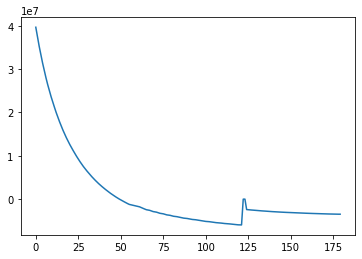

In [252]:
plt.plot(obj_relaxed_total_mult[80:])

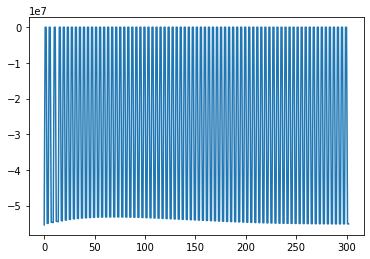

In [74]:
plt.plot(obj_relaxed_total_mult[700:])

In [8]:
u_mult = utils.load_obj('u_mult')
eta_0_mult = utils.load_obj('eta_0_mult')
eta_mult = utils.load_obj('eta_mult')
auto_param_obj_history_mult = utils.load_obj('auto_param_obj_history_mult')
auto_param_relaxed_obj_history_mult = utils.load_obj('auto_param_relaxed_obj_history_mult')

Text(0.5, 1.0, 'OAR constraints')

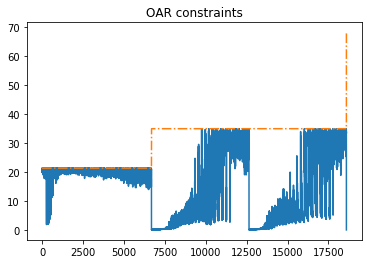

In [262]:
plt.plot(optimization_tools.constraints_all(u_mult_dv, updated_H, updated_gamma, updated_D, updated_C, tol = 0.05, verbose = 0)['Constr at u_opt'])
plt.plot(optimization_tools.constraints_all(u_mult_dv, updated_H, updated_gamma, updated_D, updated_C, tol = 0.05, verbose = 0)['actual constr'], '-.')
plt.title('OAR constraints')

Text(0.5, 1.0, 'OAR constraints')

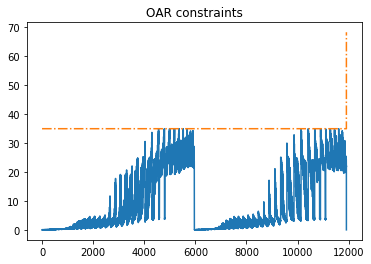

In [100]:
plt.plot(optimization_tools.constraints_all(u_conv, H_conv, gamma_conv, D_conv, C_conv, tol = 0.05, verbose = 0)['Constr at u_opt'])
plt.plot(optimization_tools.constraints_all(u_conv, H_conv, gamma_conv, D_conv, C_conv, tol = 0.05, verbose = 0)['actual constr'], '-.')
plt.title('OAR constraints')

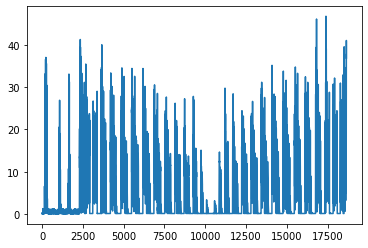

In [21]:
plt.plot(u_mult)

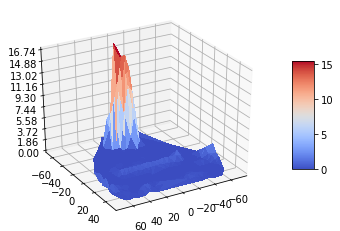

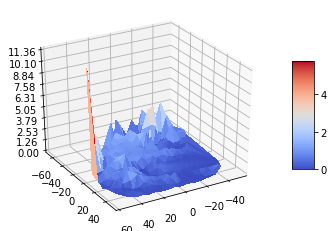

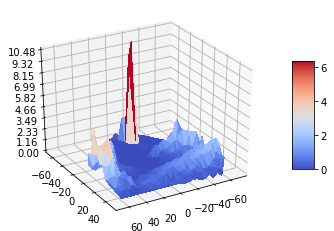

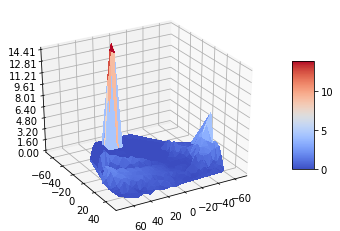

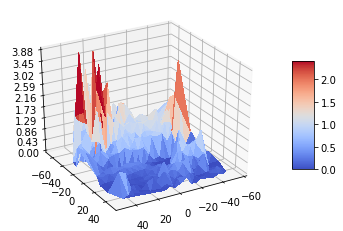

In [254]:
%matplotlib inline
for i in range(5):
    x_beam = data['beamlet_pos'][beamlet_indices[i]][:,0]
    y_beam = data['beamlet_pos'][beamlet_indices[i]][:,1]
    u_beam = u_mult_dv[:2289][beamlet_indices[i]]
    evaluation.plot_beam(x_beam, y_beam, u_beam)

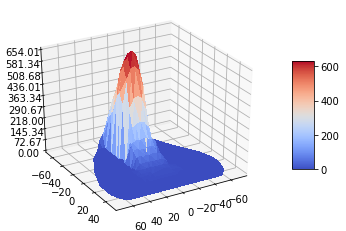

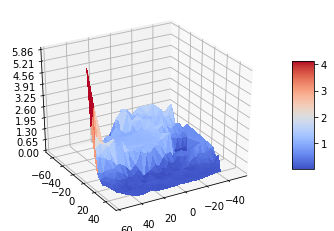

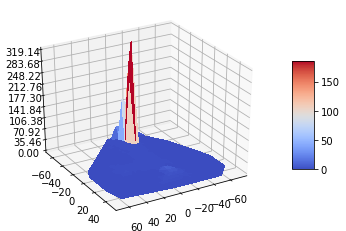

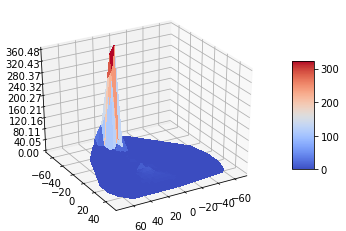

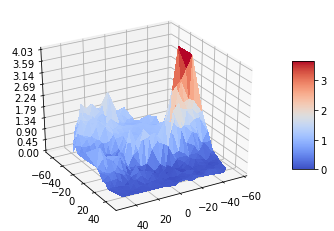

In [56]:
%matplotlib inline
for i in range(5):
    x_beam = data['beamlet_pos'][beamlet_indices[i]][:,0]
    y_beam = data['beamlet_pos'][beamlet_indices[i]][:,1]
    u_beam = u_mult[:2289][beamlet_indices[i]]
    evaluation.plot_beam(x_beam, y_beam, u_beam)

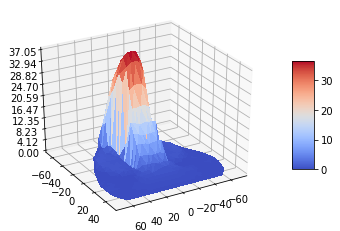

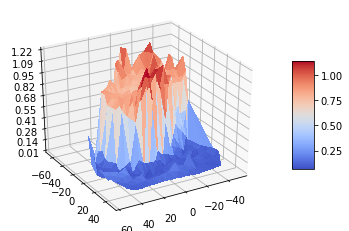

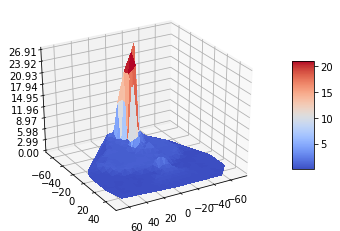

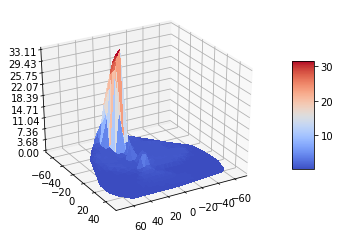

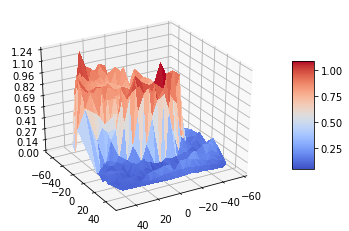

In [27]:
%matplotlib inline
for i in range(5):
    x_beam = data['beamlet_pos'][beamlet_indices[i]][:,0]
    y_beam = data['beamlet_pos'][beamlet_indices[i]][:,1]
    u_beam = u_conv[:2289][beamlet_indices[i]]
    evaluation.plot_beam(x_beam, y_beam, u_beam)

In [17]:
plt.plot(u_conv)
plt.plot(u_mult[:2289])
# plt.plot(u_conv)

NameError: name 'u_conv' is not defined

In [7]:
u_mult_with_error = np.load('u_mult_with_error.npy')

In [8]:
u_uniform = np.ones(u_mult_with_error.shape)

In [278]:
d_Target, DV_fractions_Target, organ_BE, organ_photon_dose, organ_proton_dose, organ_photon_BE_Target, organ_proton_BE_Target = evaluation.evaluation_function(u_mult_dv, [43,1], data, 'Target', Alpha, Beta, Gamma, Delta, 3000, resolution = 500)
d_LFemur, DV_fractions_LFemur, organ_BE, organ_photon_dose, organ_proton_dose, organ_photon_BE_LFemur, organ_proton_BE_LFemur = evaluation.evaluation_function(u_mult, [43,1], data, 'L Femur', Alpha, Beta, Gamma, Delta, 3000, resolution = 500)
d_RFemur, DV_fractions_RFemur, organ_BE, organ_photon_dose, organ_proton_dose, organ_photon_BE_RFemur, organ_proton_BE_RFemur = evaluation.evaluation_function(u_mult, [43,1], data, 'R Femur', Alpha, Beta, Gamma, Delta, 3000, resolution = 500)
d_Rectum, DV_fractions_Rectum, organ_BE, organ_photon_dose, organ_proton_dose, organ_photon_BE_Rectum, organ_proton_BE_Rectum = evaluation.evaluation_function(u_mult, [43,1], data, 'Rectum', Alpha, Beta, Gamma, Delta, 3000, resolution = 500)
d_Bladder, DV_fractions_Bladder, organ_BE, organ_photon_dose, organ_proton_dose, organ_photon_BE_Bladder, organ_proton_BE_Bladder = evaluation.evaluation_function(u_mult, [43,1], data, 'Bladder', Alpha, Beta, Gamma, Delta, 3000, resolution = 500)

In [105]:
# eval_list = [evaluation.evaluation_function(u_mult_with_error, [43,1], data, i, Alpha, Beta, Gamma, Delta, resolution = 50) for i in ['Target', 'L Femur', 'R Femur']]

In [112]:
organ_photon_BE_Rectum + organ_proton_BE_Rectum

array([342.00217259, 228.80453338, 160.19641381, ...,  43.65474977,
        43.88910435, 115.76017748])

In [117]:
oar_indices = np.split(np.arange(data['Aphoton'].shape[0]), np.cumsum(np.squeeze(data['num_voxels'])[1:]))[:-1]

In [148]:
organ_photon_BE_Rectum + organ_proton_BE_Rectum <= np.array(C_mult_max)[oar_indices[0]]

array([False, False, False, ..., False, False, False])

In [149]:
rectum_BE = organ_photon_BE_Rectum + organ_proton_BE_Rectum 

In [150]:
np.argsort(rectum_BE)

array([1740, 1729, 1754, ...,  531,  483,  523])

In [158]:
(rectum_BE.shape[0]//2 + rectum_BE.shape[0]%2)

887

In [168]:
# np.arange(1773)[np.argsort(rectum_BE)[:(rectum_BE.shape[0]//2 + rectum_BE.shape[0]%2)]]

In [197]:
dv_oar_names = [str(i[0]) for i in np.squeeze(data['Organ'])[1:][data['OAR_constraint_types'] == 'dose_volume']]
dv_oar_names

['Rectum', 'Bladder']

In [ ]:
np.squeeze(data['Organ'])[1:][data['OAR_constraint_types'] == 'dose_volume']

In [220]:
len(H_mult_max), len(C_mult_max)

(25279, 25279)

In [226]:
def generate_dose_volume_input(T_list_mult_max, T_mult_max, H_mult_max, alpha_mult_max, gamma_mult_max, B_mult_max, D_mult_max, C_mult_max, u_mult, N, data, Alpha, Beta, Gamma, Delta):
    oar_indices = np.split(np.arange(data['Aphoton'].shape[0]), np.cumsum(np.squeeze(data['num_voxels'])[1:]))[:-1]
    dv_oar_names = [str(i[0]) for i in np.squeeze(data['Organ'])[1:][data['OAR_constraint_types'] == 'dose_volume']]
    for i, name in enumerate(dv_oar_names):
        _,_,_,_,_, oar_photon_BE, oar_proton_BE = evaluation.evaluation_function(u_mult, N, data, name, Alpha, Beta, Gamma, Delta, 3000, resolution = 500)
        oar_BE = oar_photon_BE + oar_proton_BE
        #Take the low 50% of the voxels
        cur_oar_indices_to_max_constrain = np.argsort(oar_BE)[:(oar_BE.shape[0]//2 + oar_BE.shape[0]%2)]
#         constraint = np.array(C_mult_max)[oar_indices[0]]
        cur_oar_number = np.arange(len(oar_indices))[data['OAR_constraint_types'] == 'dose_volume'][i]
        oar_indices[cur_oar_number] = cur_oar_indices_to_max_constrain
    updated_C = [C_mult_max[i] for oar in oar_indices for i in oar]
    updated_H = [H_mult_max[i] for oar in oar_indices for i in oar]
    updated_gamma = [gamma_mult_max[i] for oar in oar_indices for i in oar]
    updated_D = [D_mult_max[i] for oar in oar_indices for i in oar]
    return oar_indices, T_list_mult_max, T_mult_max, updated_H, alpha_mult_max, updated_gamma, B_mult_max, updated_D, updated_C
        

In [227]:
a = [oar_indices, T_list_mult_max, T_mult_max, updated_H, alpha_mult_max, updated_gamma, B_mult_max, updated_D, updated_C] = generate_dose_volume_input(T_list_mult_max, T_mult_max, H_mult_max, alpha_mult_max, gamma_mult_max, B_mult_max, D_mult_max, C_mult_max, u_mult, N, data, Alpha, Beta, Gamma, Delta)

In [230]:
[len(i) for i in a[3:]]

[18596, 13564, 18596, 13564, 18596, 18596]

In [234]:
np.sum([len(i) for i in oar_indices[:2]]) +np.sum([len(i) for i in oar_indices[:]])

25281

In [235]:
len(H_mult_max)

25279

In [204]:
oar_indices

[array([   0,    1,    2, ..., 1770, 1771, 1772]),
 array([ 1773,  1774,  1775, ..., 13365, 13366, 13367]),
 array([13368, 13369, 13370, ..., 19323, 19324, 19325]),
 array([19326, 19327, 19328, ..., 25275, 25276, 25277]),
 array([25278])]

In [160]:
rectum_BE[np.argsort(rectum_BE)[:(rectum_BE.shape[0]//2 + rectum_BE.shape[0]%2)]]

array([   29.59700598,    30.41586139,    31.63325371,    33.43479078,
          33.60538142,    33.84549944,    34.00793496,    34.14487445,
          38.4688919 ,    39.17484221,    42.61854944,    42.78628645,
          43.05619274,    43.65474977,    43.88910435,    44.28036201,
          44.94653891,    45.03761556,    45.66162209,    45.67023062,
          46.04051141,    46.80262258,    47.89221581,    48.66283766,
          50.01292434,    50.72029881,    50.7399007 ,    50.87997623,
          51.35904743,    51.58707362,    51.83609102,    52.5111927 ,
          53.04442519,    54.00415811,    54.4116473 ,    54.49593317,
          54.89232815,    54.89645783,    55.22852302,    55.67356868,
          55.81353172,    56.03707635,    56.16480974,    56.46482273,
          56.83954907,    57.06068083,    57.11307825,    57.30292993,
          57.44472649,    57.47095043,    57.85920396,    58.16781941,
          59.24585014,    59.31840887,    60.00098455,    60.55023517,
      

In [140]:
# new_C1 = np.concatenate([[C_mult_max[i] for i in oar] for oar in oar_indices])
# new_C1

array([21.38888889, 21.38888889, 21.38888889, ..., 35.        ,
       35.        , 68.34722222])

In [141]:
new_C = np.array([C_mult_max[i] for oar in oar_indices for i in oar])
new_C

array([21.38888889, 21.38888889, 21.38888889, ..., 35.        ,
       35.        , 68.34722222])

In [142]:
new_C1==new_C

array([ True,  True,  True, ...,  True,  True,  True])

In [127]:
C_mult_max[]

TypeError: list indices must be integers or slices, not tuple

In [264]:
np.sum(organ_photon_BE_Target)

1706915433.0965953

In [280]:
np.sum(organ_photon_BE_Target), np.sum(organ_proton_BE_Target) 

(701670.141846684, 16760.523929836192)

In [265]:
np.sum(organ_proton_BE_Target) 

32192.75687011882

In [108]:
# eval_list[]

In [109]:
# import seaborn as sns
#683189

Text(0, 0.5, 'Fraction')

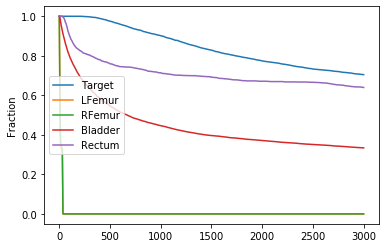

In [110]:
plt.plot(d_Target, DV_fractions_Target, label = 'Target')
plt.plot(d_LFemur, DV_fractions_LFemur, label = 'LFemur')
plt.plot(d_RFemur, DV_fractions_RFemur, label = 'RFemur')
plt.plot(d_Bladder, DV_fractions_Bladder, label = 'Bladder')
plt.plot(d_Rectum, DV_fractions_Rectum, label = 'Rectum')
plt.legend()
# plt.xlabel('Gy')
plt.ylabel('Fraction')

Text(0, 0.5, 'Fraction')

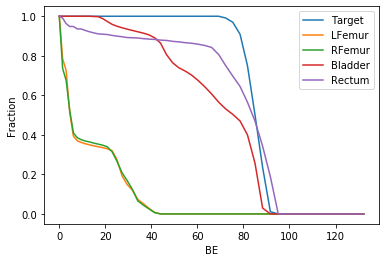

In [15]:
plt.plot(BE_conventional, DV_fractions_Target, label = 'Target')
plt.plot(BE_conventional, DV_fractions_LFemur, label = 'LFemur')
plt.plot(BE_conventional, DV_fractions_RFemur, label = 'RFemur')
plt.plot(BE_conventional, DV_fractions_Bladder, label = 'Bladder')
plt.plot(BE_conventional, DV_fractions_Rectum, label = 'Rectum')
plt.legend()
plt.xlabel('BE')
plt.ylabel('Fraction')

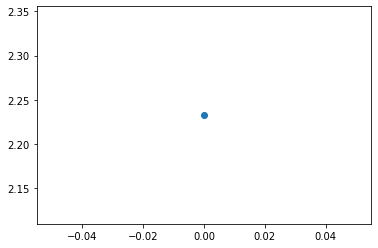

In [33]:
plt.plot(organ_photon_dose, 'o')

In [274]:
def evaluation_function_photon(u, N, data, organ_name, Alpha, Beta, Gamma, Delta, max_BE = 200, resolution = 50):
    """Constructs DVH"""
    #Target is included here:
    organ_names = [str(i[0]) for i in np.squeeze(data['Organ'])]
    organ_number = organ_names.index(organ_name)
    organ_number_no_target = organ_number-1
    len_voxels = data['Aphoton'].shape[0]
    #[:-1] because we don't wabt the last isolated voxel
    organ_indices = np.split(np.arange(len_voxels), np.cumsum(np.squeeze(data['num_voxels'])))[:-1]
    #Do this in per-voxel fashion
    photon_num = data['Aphoton'].shape[1]
    u_photon = u[:photon_num]
    u_proton = u[photon_num:]
    organ_Aphoton = data['Aphoton'][organ_indices[organ_number]]
#     organ_Aproton = data['Aproton'][organ_indices[organ_number]]
    organ_photon_dose = organ_Aphoton.dot(u_photon) #shape of this is num_voxels
#     organ_proton_dose = organ_Aproton.dot(u_proton)
    if organ_name != 'Target':
        organ_photon_BE = N[0]*Gamma[organ_number_no_target][
            0]*organ_photon_dose + N[0]*Delta[organ_number_no_target][0]*organ_photon_dose**2
#         organ_proton_BE = N[1]*Gamma[organ_number_no_target][
#             1]*organ_proton_dose + N[1]*Delta[organ_number_no_target][1]*organ_proton_dose**2
    if organ_name == 'Target':
        organ_photon_BE = N[0]*Alpha[0]*organ_photon_dose + N[0]*Beta[0]*organ_photon_dose**2
#         organ_proton_BE = N[1]*Alpha[1]*organ_proton_dose + N[1]*Beta[1]*organ_proton_dose**2
    organ_BE = organ_photon_BE #+ organ_proton_BE #shape of this is num_voxels(for this OAR/organ)
    #Now we would need to compute the RHS for different d and compare each voxel to it
    #This is a TODO for tomorrow
#     total_N = 45 #Standard practice - 45 fractions of Photons
#     d = np.linspace(0, max_, resolution)/total_N
#     if organ_name != 'Target':
#         lin = Gamma[organ_number_no_target][0]*total_N
#         quad = Delta[organ_number_no_target][0]*total_N    
#         BE_conventional = lin*d + quad*d**2
#     if organ_name == 'Target':
#         lin = Alpha[0]*total_N
#         quad = Beta[0]*total_N    
#         BE_conventional = lin*d + quad*d**2
    BE_levels = np.linspace(0, max_BE, resolution)
    #Now for each BE level find the fraction of voxels that are <=
    DV_fractions = []
    for BE_level in BE_levels:
        DV_fraction = np.sum(organ_BE >= BE_level)/len(organ_BE)
        DV_fractions.append(DV_fraction)
    #Note that organ_BE and organ_photon_BE should be the same    
    print('organ_BE: ', organ_BE)
    print('organ_photon_BE: ', organ_photon_BE)
    return BE_levels, DV_fractions, organ_BE, organ_photon_dose, organ_photon_BE